*importing libraries*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math
#import sklearn as sk
from sklearn.model_selection import train_test_split

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


*file uploading*

In [3]:
data=files.upload()

Saving Pneumococcus_2009-Present_DSH_Casebase_Data.csv to Pneumococcus_2009-Present_DSH_Casebase_Data.csv


In [4]:
df=pd.read_csv(io.StringIO(data['Pneumococcus_2009-Present_DSH_Casebase_Data.csv'].decode('utf-8')))

In [5]:
df.columns

Index(['UniqueID', 'year', 'month', 'AdmDate', 'Age (month)',
       'Case Definition', 'Zila', 'Address', 'Outcome', 'Discharge Date',
       'Hospital Duration', 'organism', 'serotype'],
      dtype='object')

In [6]:
df.isnull().sum()

UniqueID               0
year                   0
month                  0
AdmDate                0
Age (month)            0
Case Definition        0
Zila                 311
Address              479
Outcome                0
Discharge Date         0
Hospital Duration      0
organism               0
serotype               0
dtype: int64

*dropping columns of null values*

In [7]:
df.drop(columns=['Zila','Address'],inplace=True)

*dropping irrelevant feature*

In [8]:
df.drop(columns=['AdmDate','Discharge Date'],inplace=True)

*creating column for checking whether its Meningistis or not*

In [9]:
df = df.assign(Meningitis=df['Case Definition']=='Meningitis')

In [10]:
df.Meningitis = df.Meningitis.replace({True: 1, False: 0})

*dropping rows with null values on serotype column*

In [11]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)
df.drop(df[df['serotype'] == 'NON TYPABLE'].index, inplace = True)
df.drop(df[df['serotype'] == 'NTD'].index, inplace = True)
df

,UniqueID,year,month,Age (month),Case Definition,Outcome,Hospital Duration,organism,serotype,Meningitis
0,1100136100,2009,Jul,21,Very sever disease,Discharge,6,Streptococcus pneumoniae,1,0
4,1100703100,2009,Sep,3,Meningitis,DORB,14,Streptococcus pneumoniae,2,1
6,1500006300,2009,Oct,69,Meningitis,Discharge,9,Streptococcus pneumoniae,1,1
8,1101205100,2009,Nov,5,Meningitis,Discharge,14,Streptococcus pneumoniae,12,1
9,1101299100,2009,Nov,6,Meningitis,Discharge,16,Streptococcus pneumoniae,14,1
...,...,...,...,...,...,...,...,...,...,...
784,1070003143,2022,Jan,1,Meningitis,Discharge,24,Streptococcus pneumoniae,5,1
785,1070003144,2022,Jan,80,Not Eligible,Discharge,14,Streptococcus pneumoniae,1,0
786,1070003191,2022,Jan,84,Not Eligible,Discharge,15,Streptococcus pneumoniae,1,0
787,1070003270,2022,Feb,75,Not Eligible,Discharge,15,Streptococcus pneumoniae,1,0


In [12]:
col1, col2 = 'Meningitis', 'year'
corr = df[col1].corr(df[col2])
round(corr, 2)

-0.28

In [13]:
col1, col2 = 'Meningitis', 'Age (month)'
corr = df[col1].corr(df[col2])
round(corr, 2)

-0.55

In [14]:
col1, col2 = 'Meningitis', 'Hospital Duration'
corr = df[col1].corr(df[col2])
round(corr, 2)

0.01

In [15]:
#@title Hidden Code
c=0
for index, row in df.iterrows():
    #print(row['c1'], row['c2'])
    if row['serotype']=='GOOG':
      c=c+1
    c

In [16]:
#@title Hidden Code
#lis=['10B','10F','11A','11A/D']
#for x in lis:
#    df.drop(df[df['serotype'] == x].index, inplace = True)
#df

*exporting the dataframe*

*total meningitis positive for each serotype*

In [17]:
#df2 = data.groupby('serotupe')['Meningitis'].count().unstack('quad').fillna(0)
by_comp = df.groupby("serotype")
df2=by_comp.sum()

In [18]:
df2.reset_index()

,serotype,UniqueID,year,Age (month),Hospital Duration,Meningitis
0,1,62791843066,110871,3427,629,19
1,10A,5508976728,10069,63,89,3
2,10A/B,1102176110,2018,6,9,1
3,10B,2301419676,4036,269,19,0
4,10F,8112454342,14105,283,56,3
...,...,...,...,...,...,...
67,7F,10324428332,18112,143,139,6
68,7F/A,2120904308,4034,12,44,1
69,8,34717790776,62474,319,393,22
70,9L,1101355310,2017,93,21,0


*Creating another dataframe*

In [19]:
df4=pd.concat([df2['Meningitis']],axis=1)
df4.reset_index()

,serotype,Meningitis
0,1,19
1,10A,3
2,10A/B,1
3,10B,0
4,10F,3
...,...,...
67,7F,6
68,7F/A,1
69,8,22
70,9L,0


*total data for each serotype*

In [20]:
by_comp = df.groupby("serotype")
df3=by_comp.count()
df3.reset_index()

,serotype,UniqueID,year,month,Age (month),Case Definition,Outcome,Hospital Duration,organism,Meningitis
0,1,55,55,55,55,55,55,55,55,55
1,10A,5,5,5,5,5,5,5,5,5
2,10A/B,1,1,1,1,1,1,1,1,1
3,10B,2,2,2,2,2,2,2,2,2
4,10F,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...
67,7F,9,9,9,9,9,9,9,9,9
68,7F/A,2,2,2,2,2,2,2,2,2
69,8,31,31,31,31,31,31,31,31,31
70,9L,1,1,1,1,1,1,1,1,1


In [21]:
df3.rename(columns = {'Meningitis':'Total_case_serotype'}, inplace = True)
df3

,UniqueID,year,month,Age (month),Case Definition,Outcome,Hospital Duration,organism,Total_case_serotype
serotype,,,,,,,,,
1,55,55,55,55,55,55,55,55,55
10A,5,5,5,5,5,5,5,5,5
10A/B,1,1,1,1,1,1,1,1,1
10B,2,2,2,2,2,2,2,2,2
10F,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...
7F,9,9,9,9,9,9,9,9,9
7F/A,2,2,2,2,2,2,2,2,2
8,31,31,31,31,31,31,31,31,31


In [22]:
df4=pd.concat([df2['Meningitis'],df3['Total_case_serotype']],axis=1)
df4
df4.reset_index()

,serotype,Meningitis,Total_case_serotype
0,1,19,55
1,10A,3,5
2,10A/B,1,1
3,10B,0,2
4,10F,3,7
...,...,...,...
67,7F,6,9
68,7F/A,1,2
69,8,22,31
70,9L,0,1


*Evaluating the percentage*

In [23]:
df4.assign(percentage=lambda x: x['Meningitis']*100 /x['Total_case_serotype'])

,Meningitis,Total_case_serotype,percentage
serotype,,,
1,19,55,34.545455
10A,3,5,60.000000
10A/B,1,1,100.000000
10B,0,2,0.000000
10F,3,7,42.857143
...,...,...,...
7F,6,9,66.666667
7F/A,1,2,50.000000
8,22,31,70.967742


In [24]:
df_6=df4.reset_index().assign(percentage=lambda x: x['Meningitis']*100 /x['Total_case_serotype'])

In [25]:
te=pd.DataFrame(df_6)
te.to_excel("parcentage_data2.xlsx")

*------------------------------------------------------------------------------*

In [26]:
plt.rcParams['figure.figsize'] = [40,20]

**whether its Meningiis or not**

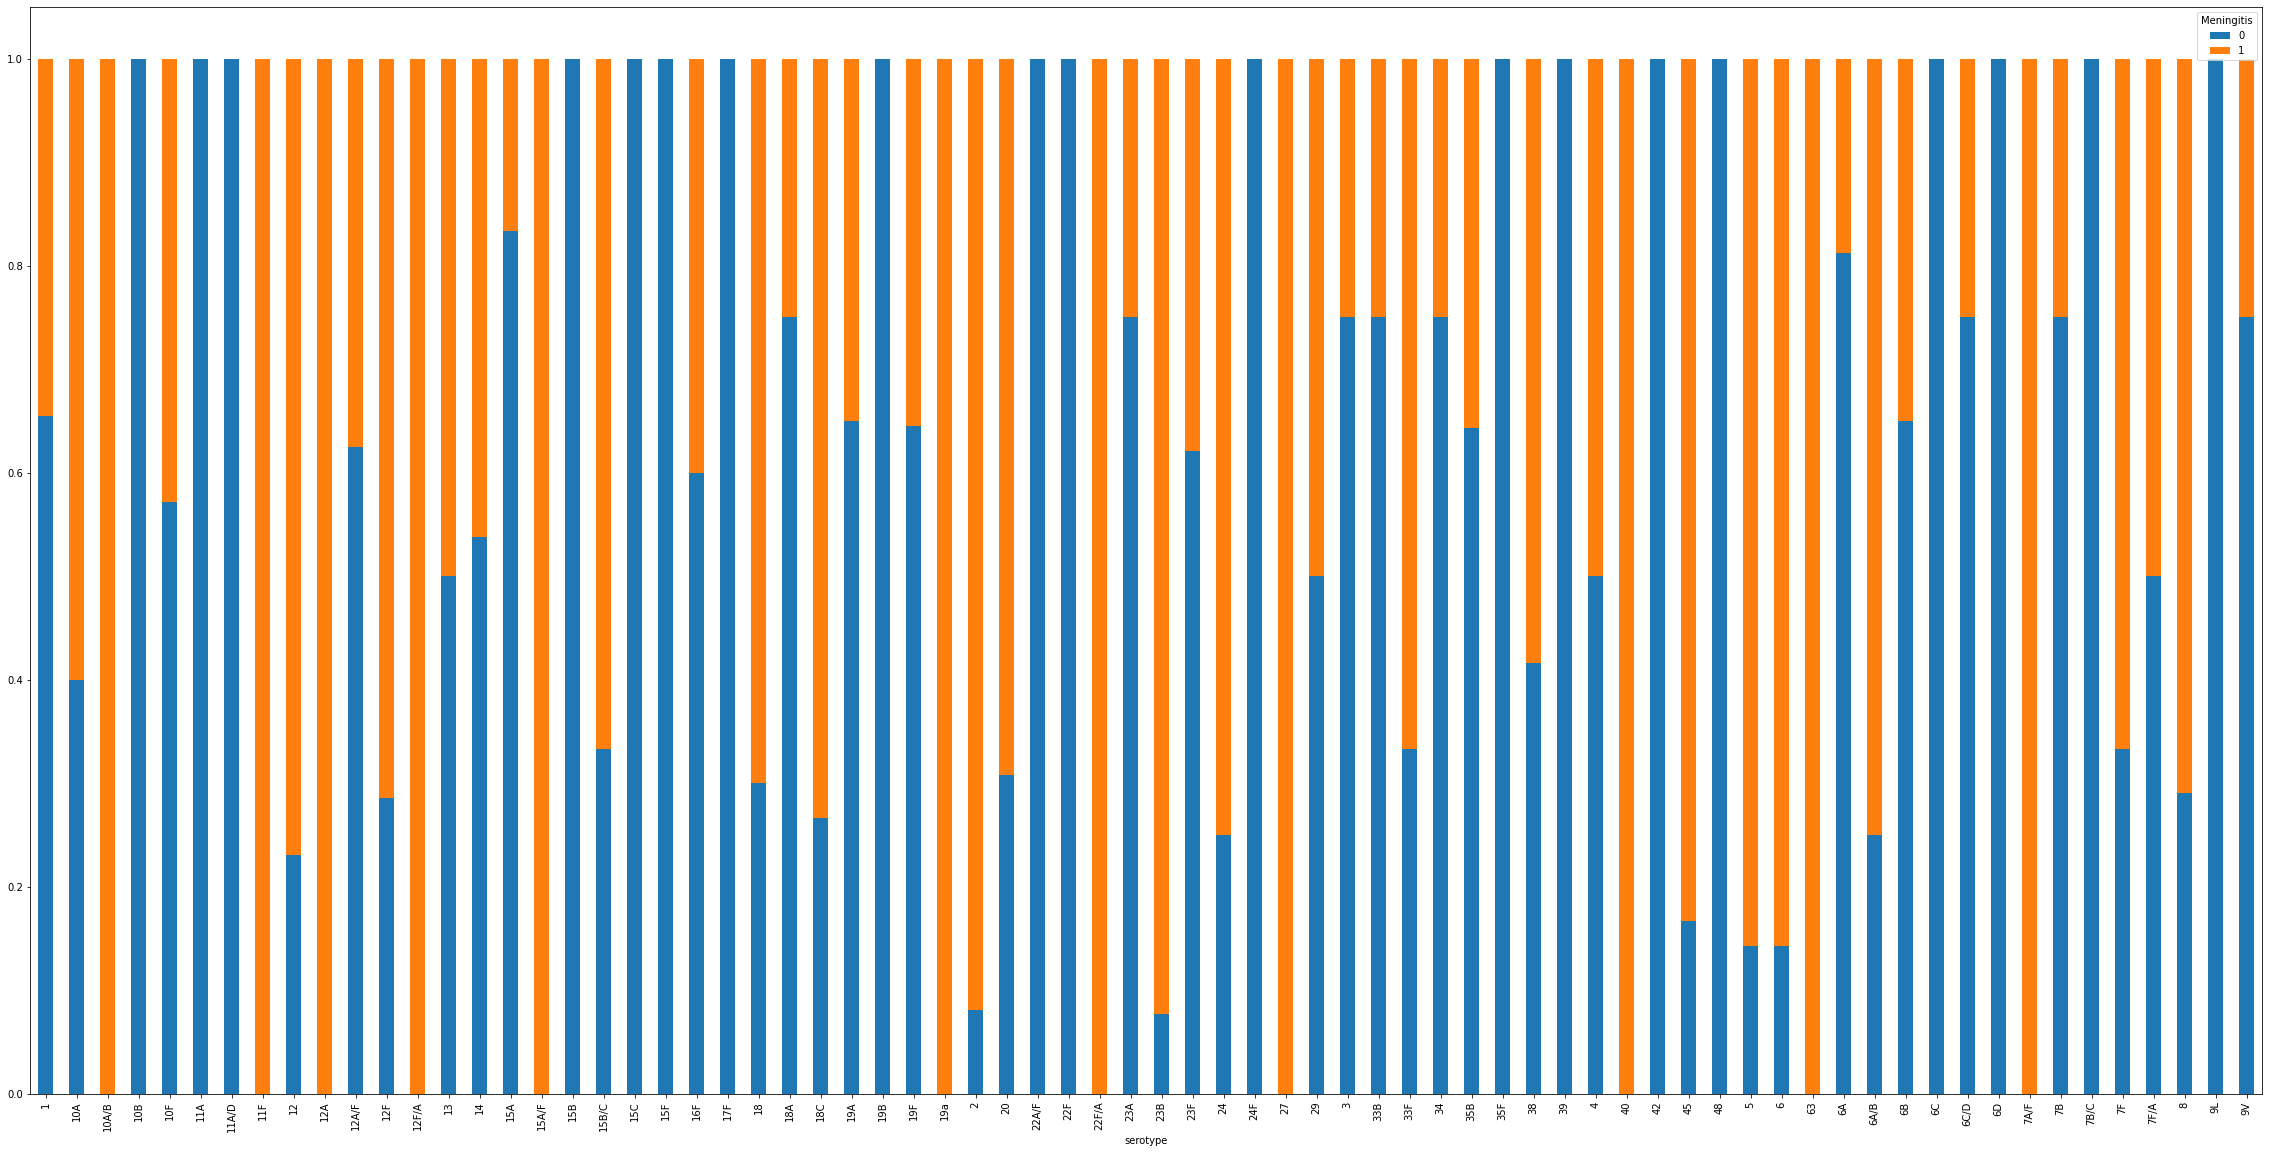

In [27]:
df.groupby('serotype')['Meningitis'].value_counts(normalize=True).unstack('Meningitis').plot.bar(stacked=True)

*--------------------------------------------------------------------------*

In [28]:
#df.drop(df[df['serotype'] == {'10A','10B','10F','11A','11A/D'}].index, inplace = True)
#,'12A/F','13','14','15A','15B','15B/C','15C','15F','16F','17F','18A','19A','19B','19F','22A/F','22F','23A'
#,'23F','24F','29','3','33B','33F','34','35B','35F','38','39','4','42','48','6A','6B','6C','6C/D','6D','7B','7B/C','7F/A','9L','9V'

In [29]:
#df.drop(df[df['serotype'] == {'10A','10B','10F','11A','11A/D','12A/F','13','14','15A','15B','15B/C','15C','15F','16F','17F','18A','19A','19B','19F','22A/F','22F','23A','23F','24F','29','3','33B','33F','34','35B','35F','38','39','4','42','48','6A','6B','6C','6C/D','6D','7B','7B/C','7F/A','9L','9V'}].index, inplace = True)

**Dropping some serotypes**

In [30]:
#df.drop(df[df['serotype'] == '10A'].index, inplace = True)
#df.drop(df[df['serotype'] == '10B'].index, inplace = True)
#df.drop(df[df['serotype'] == '10F'].index, inplace = True)
#df.drop(df[df['serotype'] == '11A'].index, inplace = True)
#df.drop(df[df['serotype'] == '11A/D'].index, inplace = True)
#df

In [31]:
df

,UniqueID,year,month,Age (month),Case Definition,Outcome,Hospital Duration,organism,serotype,Meningitis
0,1100136100,2009,Jul,21,Very sever disease,Discharge,6,Streptococcus pneumoniae,1,0
4,1100703100,2009,Sep,3,Meningitis,DORB,14,Streptococcus pneumoniae,2,1
6,1500006300,2009,Oct,69,Meningitis,Discharge,9,Streptococcus pneumoniae,1,1
8,1101205100,2009,Nov,5,Meningitis,Discharge,14,Streptococcus pneumoniae,12,1
9,1101299100,2009,Nov,6,Meningitis,Discharge,16,Streptococcus pneumoniae,14,1
...,...,...,...,...,...,...,...,...,...,...
784,1070003143,2022,Jan,1,Meningitis,Discharge,24,Streptococcus pneumoniae,5,1
785,1070003144,2022,Jan,80,Not Eligible,Discharge,14,Streptococcus pneumoniae,1,0
786,1070003191,2022,Jan,84,Not Eligible,Discharge,15,Streptococcus pneumoniae,1,0
787,1070003270,2022,Feb,75,Not Eligible,Discharge,15,Streptococcus pneumoniae,1,0


In [32]:
serotype=pd.get_dummies(df['serotype'],drop_first=True)

In [33]:
df=pd.concat([df,serotype],axis=1)
df.head(5)

,UniqueID,year,month,Age (month),Case Definition,Outcome,Hospital Duration,organism,serotype,Meningitis,...,6C/D,6D,7A/F,7B,7B/C,7F,7F/A,8,9L,9V
0,1100136100,2009,Jul,21,Very sever disease,Discharge,6,Streptococcus pneumoniae,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1100703100,2009,Sep,3,Meningitis,DORB,14,Streptococcus pneumoniae,2,1,...,0,0,0,0,0,0,0,0,0,0
6,1500006300,2009,Oct,69,Meningitis,Discharge,9,Streptococcus pneumoniae,1,1,...,0,0,0,0,0,0,0,0,0,0
8,1101205100,2009,Nov,5,Meningitis,Discharge,14,Streptococcus pneumoniae,12,1,...,0,0,0,0,0,0,0,0,0,0
9,1101299100,2009,Nov,6,Meningitis,Discharge,16,Streptococcus pneumoniae,14,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.drop(columns=['Case Definition','month','Outcome','organism'],inplace=True)

In [35]:
df.drop(columns=['UniqueID','serotype',],inplace=True)

In [36]:
#df.head(5)

# Training Data

In [37]:
X=df.drop('Meningitis',axis=1)
y=df['Meningitis']

In [38]:
#df.head(5)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel=LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [43]:
predictions=logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.65      0.73        85\n           1       0.73      0.89      0.81        93\n\n    accuracy                           0.78       178\n   macro avg       0.79      0.77      0.77       178\nweighted avg       0.79      0.78      0.77       178\n'

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.65      0.73        85
           1       0.73      0.89      0.81        93

    accuracy                           0.78       178
   macro avg       0.79      0.77      0.77       178
weighted avg       0.79      0.78      0.77       178



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test,predictions)

array([[55, 30],
       [10, 83]])

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,predictions)

0.7752808988764045